<a href="https://colab.research.google.com/github/NCuluze/ActivityProviderLMS/blob/master/pneumonia_detection_densenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.19.0
GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.27G/2.29G [00:17<00:00, 222MB/s]
100% 2.29G/2.29G [00:18<00:00, 137MB/s]
Conteúdo da pasta data:
['chest_xray']
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 707ms/step - accuracy: 0.6734 - loss: 0.7128 - val_accuracy: 0.6875 - val_loss: 0.6353
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 615ms/step - accuracy: 0.8791 - loss: 0.2812 - val_accuracy: 0.6875 - val_loss: 0.6040
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 617ms/step - accuracy: 0.9095 - loss: 0.2235 - val_accuracy: 0.6875 - val_loss: 0.5333
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 614ms/step - accuracy: 0.9202 - loss: 0.1954 - val_accuracy: 0.6875 - val_loss: 0.4360
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 611ms/step - accuracy: 0.9276 - loss: 0.1825 - val_accuracy: 0.6875 - val_loss: 0.4379
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 616ms/step - accuracy: 0.9346 - loss: 0.1682 - val_accuracy: 0.6875 - val_loss: 0.4578
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 612ms/step - accuracy: 0.9335 - loss: 0.1668 - val_accuracy: 0.7500 - val_loss: 0.4217
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9432 -

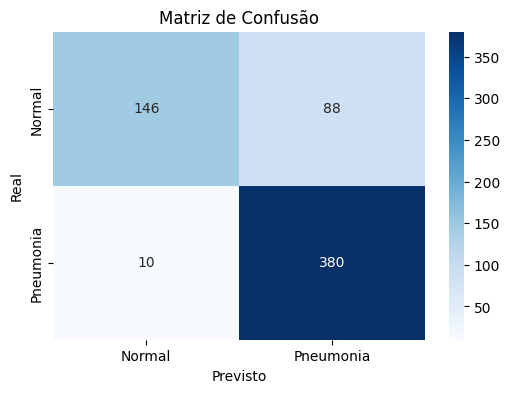

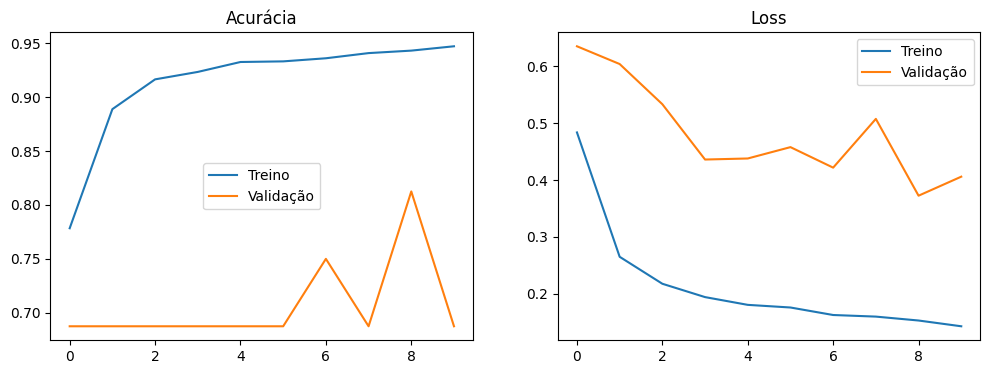

Modelo guardado com sucesso!


In [4]:
# =========================================================
# PASSO 1 - VERIFICAR GPU E AMBIENTE
# =========================================================
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU disponível:", tf.config.list_physical_devices('GPU'))


# =========================================================
# PASSO 2 - INSTALAR KAGGLE API
# =========================================================
!pip install -q kaggle


# =========================================================
# PASSO 3 - UPLOAD DO ARQUIVO kaggle.json
# =========================================================
from google.colab import files
files.upload()   # Fazer upload do kaggle.json


# =========================================================
# PASSO 4 - CONFIGURAR CREDENCIAIS DO KAGGLE
# =========================================================
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# =========================================================
# PASSO 5 - DOWNLOAD DO DATASET
# =========================================================
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


# =========================================================
# PASSO 6 - EXTRAIR DATASET
# =========================================================
import zipfile
import os

with zipfile.ZipFile("chest-xray-pneumonia.zip", "r") as zip_ref:
    zip_ref.extractall("data")

print("Conteúdo da pasta data:")
print(os.listdir("data"))


# =========================================================
# PASSO 7 - IMPORTAR BIBLIOTECAS
# =========================================================
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


# =========================================================
# PASSO 8 - DEFINIR PARÂMETROS
# =========================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_dir = "data/chest_xray/train"
val_dir   = "data/chest_xray/val"
test_dir  = "data/chest_xray/test"


# =========================================================
# PASSO 9 - PRÉ-PROCESSAMENTO E DATA AUGMENTATION
# =========================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


# =========================================================
# PASSO 10 - CONSTRUIR MODELO DENSENET-121
# =========================================================
base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False   # Transfer Learning

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


# =========================================================
# PASSO 11 - TREINAR MODELO
# =========================================================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


# =========================================================
# PASSO 12 - AVALIAÇÃO NO CONJUNTO DE TESTE
# =========================================================
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


# =========================================================
# PASSO 13 - MÉTRICAS DETALHADAS
# =========================================================
from sklearn.metrics import classification_report, confusion_matrix

y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype("int32").flatten()

print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))


# =========================================================
# PASSO 14 - MATRIZ DE CONFUSÃO
# =========================================================
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Pneumonia"],
    yticklabels=["Normal", "Pneumonia"]
)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


# =========================================================
# PASSO 15 - GRÁFICOS DE TREINO
# =========================================================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Treino")
plt.plot(history.history["val_accuracy"], label="Validação")
plt.title("Acurácia")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Treino")
plt.plot(history.history["val_loss"], label="Validação")
plt.title("Loss")
plt.legend()

plt.show()


# =========================================================
# PASSO 16 - GUARDAR MODELO
# =========================================================
model.save("modelo_pneumonia_densenet121.h5")
print("Modelo guardado com sucesso!")

